# Importaciones

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re
from sklearn import metrics

In [2]:
pd.set_option('display.max_rows', None)

# Carga de datos

In [3]:
# Cargar los datos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_df = pd.read_csv('data/sample_submission.csv')

# Primeras exploraciones

In [4]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [5]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [6]:
test_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [9]:
train_df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


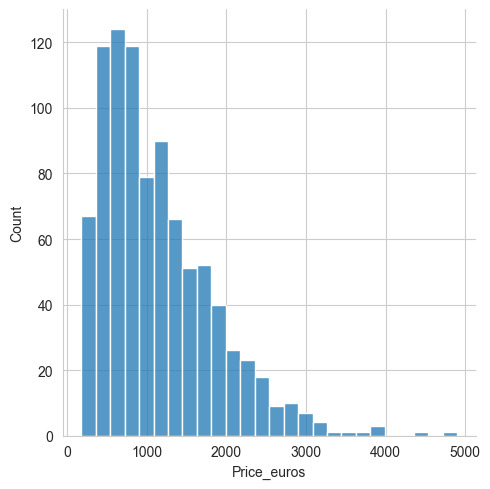

In [10]:
sns.displot(train_df['Price_euros']);

In [11]:
train_df[['Price_euros', 'Inches']].corr()

,Price_euros,Inches
Price_euros,1.000000,0.070152
Inches,0.070152,1.000000


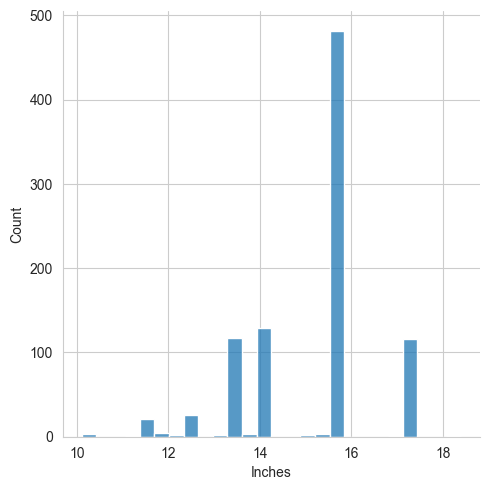

In [12]:
sns.displot(train_df['Inches']);

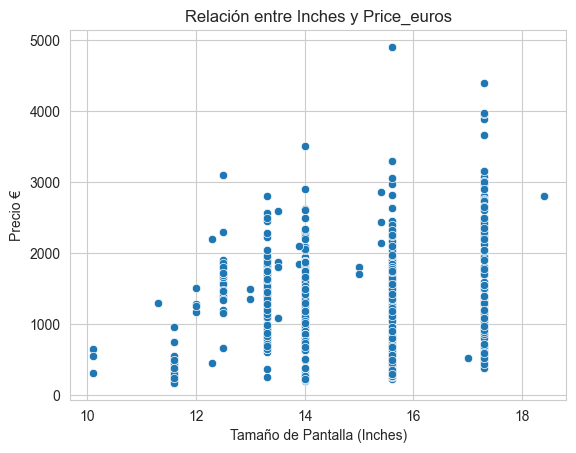

In [13]:
sns.scatterplot(data=train_df, x='Inches', y='Price_euros')
plt.title("Relación entre Inches y Price_euros")
plt.xlabel("Tamaño de Pantalla (Inches)")
plt.ylabel("Precio €")
plt.show()

# Limpieza de datos

In [14]:
train_df['Company'].unique()

array(['Asus', 'Lenovo', 'Dell', 'Mediacom', 'Toshiba', 'HP', 'Acer',
       'Apple', 'MSI', 'Fujitsu', 'Samsung', 'Chuwi', 'Microsoft',
       'Razer', 'Xiaomi', 'Huawei', 'Google', 'Vero', 'LG'], dtype=object)

In [15]:
train_df['Company'].value_counts()

Company
Dell         218
HP           197
Lenovo       193
Asus         110
Acer          76
Toshiba       37
MSI           36
Apple         17
Mediacom       6
Samsung        5
Microsoft      4
Razer          4
Xiaomi         2
Huawei         2
Google         1
Vero           1
Fujitsu        1
Chuwi          1
LG             1
Name: count, dtype: int64

In [16]:
train_df['Product'].value_counts()

Product
Inspiron 3567                                    24
XPS 13                                           21
Vostro 3568                                      15
250 G6                                           13
Inspiron 5570                                    12
Legion Y520-15IKBN                               12
Inspiron 5567                                    11
Alienware 17                                     11
Latitude 5580                                    10
Satellite Pro                                    10
Inspiron 7567                                    10
ProBook 450                                      10
Aspire 3                                          9
MacBook Pro                                       9
EliteBook 840                                     9
Vostro 5568                                       8
EliteBook 820                                     6
ProBook 470                                       6
ThinkPad Yoga                                     6
Elit

In [17]:
train_df['TypeName'].value_counts()

TypeName
Notebook              516
Gaming                143
Ultrabook             130
2 in 1 Convertible     84
Workstation            22
Netbook                17
Name: count, dtype: int64

In [18]:
train_df['Inches'].value_counts()

Inches
15.6    481
14.0    129
17.3    116
13.3    113
12.5     26
11.6     21
12.0      4
13.5      4
15.4      3
13.9      3
10.1      3
13.0      2
12.3      2
15.0      2
18.4      1
11.3      1
17.0      1
Name: count, dtype: int64

In [19]:
train_df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                362
1366x768                                         207
IPS Panel Full HD 1920x1080                      145
IPS Panel Full HD / Touchscreen 1920x1080         37
Full HD / Touchscreen 1920x1080                   34
1600x900                                          15
Quad HD+ / Touchscreen 3200x1800                  10
Touchscreen 1366x768                               9
IPS Panel 4K Ultra HD 3840x2160                    9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      7
IPS Panel Retina Display 2560x1600                 6
4K Ultra HD 3840x2160                              6
4K Ultra HD / Touchscreen 3840x2160                6
IPS Panel 1366x768                                 5
IPS Panel Retina Display 2304x1440                 4
IPS Panel Touchscreen 2560x1440                    4
IPS Panel 2560x1440                                4
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
Touchscreen 2256x1504        

In [20]:
train_df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              143
Intel Core i7 7700HQ 2.8GHz             107
Intel Core i7 7500U 2.7GHz               87
Intel Core i3 6006U 2GHz                 51
Intel Core i7 8550U 1.8GHz               46
Intel Core i5 8250U 1.6GHz               45
Intel Core i5 6200U 2.3GHz               43
Intel Core i7 6500U 2.5GHz               36
Intel Core i3 7100U 2.4GHz               28
Intel Core i7 6700HQ 2.6GHz              27
Intel Core i5 7300HQ 2.5GHz              21
Intel Celeron Dual Core N3060 1.6GHz     20
Intel Celeron Dual Core N3350 1.1GHz     19
Intel Core i3 6006U 2.0GHz               13
Intel Core i7 6600U 2.6GHz               12
Intel Core i7 7600U 2.8GHz               11
Intel Core i5 7300U 2.6GHz               11
AMD A9-Series 9420 3GHz                  10
Intel Core i5 6300U 2.4GHz                9
Intel Pentium Quad Core N4200 1.1GHz      9
Intel Core i7 6820HK 2.7GHz               8
Intel Core i3 6100U 2.3GHz                6
Intel Pentium Quad Core N371

In [21]:
train_df['Ram'].value_counts()

Ram
8GB     428
4GB     266
16GB    140
6GB      31
12GB     20
2GB      14
32GB     11
24GB      1
64GB      1
Name: count, dtype: int64

In [22]:
train_df['Memory'].value_counts()

Memory
256GB SSD                        284
1TB HDD                          173
500GB HDD                         85
512GB SSD                         80
128GB SSD +  1TB HDD              65
128GB SSD                         53
256GB SSD +  1TB HDD              50
32GB Flash Storage                27
512GB SSD +  1TB HDD              11
1TB SSD                           10
64GB Flash Storage                10
2TB HDD                            9
256GB SSD +  2TB HDD               9
32GB SSD                           6
1.0TB Hybrid                       6
16GB Flash Storage                 5
256GB Flash Storage                4
512GB SSD +  2TB HDD               3
128GB Flash Storage                2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
32GB HDD                           1
1TB SSD +  1TB HDD                 1
1TB HDD +  1TB HDD                 1
240GB SSD                          1
64GB SSD                       

In [23]:
train_df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620             191
Intel HD Graphics 520             132
Intel UHD Graphics 620             47
Nvidia GeForce GTX 1050            40
Nvidia GeForce GTX 1060            39
Nvidia GeForce 940MX               31
Intel HD Graphics 500              28
AMD Radeon 530                     27
Intel HD Graphics 400              25
Nvidia GeForce GTX 1070            24
Nvidia GeForce GTX 1050 Ti         23
AMD Radeon R5 M430                 19
Intel HD Graphics                  16
AMD Radeon 520                     13
Nvidia GeForce 930MX               13
Intel HD Graphics 515              11
AMD Radeon R7 M445                 10
AMD Radeon R5                      10
Nvidia GeForce 920MX               10
Nvidia GeForce MX150                9
Intel HD Graphics 615               9
Intel Iris Plus Graphics 640        8
Intel HD Graphics 505               7
AMD Radeon R5 M420                  7
Nvidia GeForce GTX 950M             7
Nvidia GeForce GTX 980M             6
Nvidia G

In [24]:
train_df['OpSys'].value_counts()

OpSys
Windows 10      745
Linux            46
No OS            46
Windows 7        33
Chrome OS        18
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: count, dtype: int64

In [25]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [26]:
# Procesar la columna 'Weight' y convertirla a numérico
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)
test_df['Weight'] = test_df['Weight'].str.replace('kg', '').astype(float)

# Procesar la columna 'Ram' y convertirla a numérico
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)
test_df['Ram'] = test_df['Ram'].str.replace('GB', '').astype(int)

# Extraer la resolución de pantalla y combinarla en una sola columna 'Resolution'
train_df[['res_width', 'res_height']] = train_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)
test_df[['res_width', 'res_height']] = test_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

# Combinar 'res_width' y 'res_height' en una sola columna 'Resolution'
train_df['Resolution'] = train_df['res_width'] * train_df['res_height']
test_df['Resolution'] = test_df['res_width'] * test_df['res_height']

# Eliminar las columnas 'res_width' y 'res_height'
train_df = train_df.drop(columns=['res_width', 'res_height'])
test_df = test_df.drop(columns=['res_width', 'res_height'])

# Procesar la columna 'Memory' para separar SSD, HDD, Flash Storage y Hybrid
def parse_memory_details(memory_str):
    if isinstance(memory_str, str):
        memory_str = memory_str.strip().lower()
        ssd, hdd, flash, hybrid = 0, 0, 0, 0
        
        # Detectar y convertir SSD
        if 'ssd' in memory_str:
            matches = re.findall(r'(\d+)(tb|gb) ssd', memory_str)
            for size, unit in matches:
                ssd += int(size) * (1024 if unit == 'tb' else 1)  # Convertir TB a GB
        
        # Detectar y convertir HDD
        if 'hdd' in memory_str:
            matches = re.findall(r'(\d+)(tb|gb) hdd', memory_str)
            for size, unit in matches:
                hdd += int(size) * (1024 if unit == 'tb' else 1)  # Convertir TB a GB
        
        # Detectar Flash Storage
        if 'flash storage' in memory_str:
            flash = 1
        
        # Detectar Hybrid
        if 'hybrid' in memory_str:
            hybrid = 1
        
        return ssd, hdd, flash, hybrid
    
    # Si no es una cadena válida, devolver ceros
    return 0, 0, 0, 0

# Aplicar la función actualizada a la columna 'Memory'
train_df[['Memory_SSD', 'Memory_HDD', 'Flash_Storage', 'Hybrid']] = train_df['Memory'].apply(
    lambda x: pd.Series(parse_memory_details(x))
)
test_df[['Memory_SSD', 'Memory_HDD', 'Flash_Storage', 'Hybrid']] = test_df['Memory'].apply(
    lambda x: pd.Series(parse_memory_details(x))
)

# Eliminar la columna original 'Memory'
train_df = train_df.drop(columns=['Memory'])
test_df = test_df.drop(columns=['Memory'])

# Procesar la columna 'Cpu' para extraer detalles
def parse_cpu_details(cpu_str):
    if isinstance(cpu_str, str):
        cpu_str = cpu_str.strip().lower()
        cores = re.search(r'(\d+)\s*core', cpu_str)
        cores = int(cores.group(1)) if cores else 0
        frequency = re.search(r'(\d+\.?\d*)\s*ghz', cpu_str)
        frequency = float(frequency.group(1)) if frequency else 0.0
        family = 'Intel' if 'intel' in cpu_str else 'AMD' if 'amd' in cpu_str else 'Other'
        series = re.search(r'(i\d|ryzen \d)', cpu_str)
        series = series.group(1) if series else 'Other'
        return cores, frequency, family, series
    return 0, 0.0, 'Other', 'Other'

train_df[['Cpu_Cores', 'Cpu_Frequency', 'Cpu_Family', 'Cpu_Series']] = train_df['Cpu'].apply(
    lambda x: pd.Series(parse_cpu_details(x))
)
test_df[['Cpu_Cores', 'Cpu_Frequency', 'Cpu_Family', 'Cpu_Series']] = test_df['Cpu'].apply(
    lambda x: pd.Series(parse_cpu_details(x))
)

# Eliminar la columna 'Cpu'
train_df = train_df.drop(columns=['Cpu'])
test_df = test_df.drop(columns=['Cpu'])

train_df = pd.get_dummies(train_df, columns=['Cpu_Family', 'Cpu_Series'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Cpu_Family', 'Cpu_Series'], drop_first=True)

# Procesar la columna 'Gpu' para extraer detalles
def parse_gpu_details(gpu_str):
    if isinstance(gpu_str, str):
        gpu_str = gpu_str.strip().lower()
        brand = 'NVIDIA' if 'nvidia' in gpu_str else 'AMD' if 'amd' in gpu_str else 'Intel' if 'intel' in gpu_str else 'Other'
        family = re.search(r'(gtx|rtx|radeon|iris|hd graphics)', gpu_str)
        family = family.group(1) if family else 'Other'
        model = re.search(r'\b(\d+)\b', gpu_str)
        model = int(model.group(1)) if model else 0
        return brand, family, model
    return 'Other', 'Other', 0

train_df[['Gpu_Brand', 'Gpu_Family', 'Gpu_Model']] = train_df['Gpu'].apply(
    lambda x: pd.Series(parse_gpu_details(x))
)
test_df[['Gpu_Brand', 'Gpu_Family', 'Gpu_Model']] = test_df['Gpu'].apply(
    lambda x: pd.Series(parse_gpu_details(x))
)

train_df = pd.get_dummies(train_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)

# Procesar la columna 'Company' como variable categórica (One-Hot Encoding)
train_companies = pd.get_dummies(train_df['Company'], prefix='Company')
test_companies = pd.get_dummies(test_df['Company'], prefix='Company')

# Asegurar que ambas tablas tengan las mismas columnas
common_cols = train_companies.columns.union(test_companies.columns)
train_companies = train_companies.reindex(columns=common_cols, fill_value=0)
test_companies = test_companies.reindex(columns=common_cols, fill_value=0)

# Agregar las columnas procesadas de 'Company' al conjunto principal
train_df = pd.concat([train_df, train_companies], axis=1)
test_df = pd.concat([test_df, test_companies], axis=1)

# Procesar las columnas 'TypeName' y 'OpSys' como variables categóricas (One-Hot Encoding)
for col in ['TypeName', 'OpSys']:
    train_encoded = pd.get_dummies(train_df[col], prefix=col)
    test_encoded = pd.get_dummies(test_df[col], prefix=col)
    
    # Asegurar columnas comunes
    common_cols = train_encoded.columns.union(test_encoded.columns)
    train_encoded = train_encoded.reindex(columns=common_cols, fill_value=0)
    test_encoded = test_encoded.reindex(columns=common_cols, fill_value=0)
    
    # Agregar al conjunto principal
    train_df = pd.concat([train_df, train_encoded], axis=1)
    test_df = pd.concat([test_df, test_encoded], axis=1)
    
    # Eliminar la columna original
    train_df = train_df.drop(columns=[col])
    test_df = test_df.drop(columns=[col])

# Actualizar las características finales después de asegurar columnas comunes
features_to_use_improved = (
    ['Inches', 'Ram', 'Resolution', 'Memory_SSD', 'Memory_HDD', 'Flash_Storage', 'Hybrid', 'Cpu_Cores', 'Cpu_Frequency', 'Gpu_Model']
    + [col for col in train_df.columns if col.startswith('TypeName_') or col.startswith('OpSys_') or col.startswith('Cpu_Family_') or col.startswith('Cpu_Series_') or col.startswith('Gpu_Brand_') or col.startswith('Gpu_Family_') or col.startswith('Company_')]
)
#, 'Weight'

# Crear los conjuntos de entrenamiento y prueba
X_train_improved = train_df[features_to_use_improved]
X_test_improved = test_df[features_to_use_improved]

# Manejar columnas faltantes en el conjunto de prueba
missing_cols_test = set(X_train_improved.columns) - set(X_test_improved.columns)
for col in missing_cols_test:
    X_test_improved[col] = 0
X_test_improved = X_test_improved[X_train_improved.columns]

# Separar la variable objetivo (target)
y_train = train_df['Price_euros']

# Dividir los datos en conjunto de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_improved, y_train, test_size=0.2, random_state=42
)

# Aplicar la transformación logarítmica para la variable objetivo
y_train_log = np.log1p(y_train_split)
y_val_log = np.log1p(y_val_split)

print("Preprocesamiento completo. Datos listos para modelar.")

Preprocesamiento completo. Datos listos para modelar.


In [27]:
y_train_log.info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 25 to 102
Series name: Price_euros
Non-Null Count  Dtype  
--------------  -----  
729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


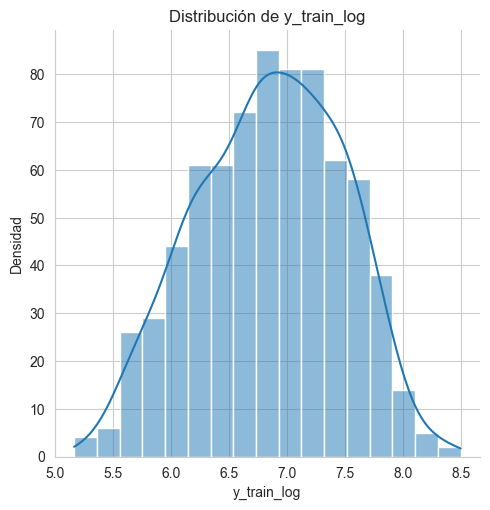

In [28]:
# Visualizar la distribución de y_train_log
sns.displot(y_train_log, kde=True)  # kde=True añade la línea de densidad
plt.title('Distribución de y_train_log')
plt.xlabel('y_train_log')
plt.ylabel('Densidad')
plt.show()

In [29]:
X_train_improved.head()

,Inches,Ram,Resolution,Memory_SSD,Memory_HDD,Flash_Storage,Hybrid,Cpu_Cores,Cpu_Frequency,Gpu_Model,...,TypeName_Workstation,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,12.5,4,2073600.0,0,0,1,0,0,0.9,515,...,False,False,True,False,False,False,False,False,False,False
1,17.3,8,2073600.0,256,1024,0,0,0,3.2,580,...,False,False,False,False,False,False,True,False,False,False
2,15.6,4,2073600.0,0,1024,0,0,0,2.7,620,...,False,False,False,False,False,False,True,False,False,False
3,13.3,16,5760000.0,512,0,0,0,0,2.5,640,...,False,False,False,False,False,False,True,False,False,False
4,15.6,4,2073600.0,0,0,0,1,0,2.5,520,...,False,False,False,False,False,False,False,False,True,False


In [30]:
X_train_improved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   Ram                          912 non-null    int32  
 2   Resolution                   912 non-null    float64
 3   Memory_SSD                   912 non-null    int64  
 4   Memory_HDD                   912 non-null    int64  
 5   Flash_Storage                912 non-null    int64  
 6   Hybrid                       912 non-null    int64  
 7   Cpu_Cores                    912 non-null    int64  
 8   Cpu_Frequency                912 non-null    float64
 9   Gpu_Model                    912 non-null    int64  
 10  Cpu_Family_Intel             912 non-null    bool   
 11  Cpu_Series_i3                912 non-null    bool   
 12  Cpu_Series_i5                912 non-null    bool   
 13  Cpu_Series_i7       

In [31]:
X_train_improved.describe()

,Inches,Ram,Resolution,Memory_SSD,Memory_HDD,Flash_Storage,Hybrid,Cpu_Cores,Cpu_Frequency,Gpu_Model
count,912.000000,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.0,912.000000,912.000000
mean,15.060746,8.357456,2.157365e+06,182.785088,437.486842,0.055921,0.008772,0.0,2.316623,512.615132
std,1.412363,5.108641,1.386117e+06,189.150687,533.515335,0.229895,0.093298,0.0,0.501611,524.189184
min,10.100000,2.000000,1.049088e+06,0.000000,0.000000,0.000000,0.000000,0.0,0.900000,0.000000
25%,14.000000,4.000000,1.440000e+06,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000
50%,15.600000,8.000000,2.073600e+06,210.000000,0.000000,0.000000,0.000000,0.0,2.500000,520.000000
75%,15.600000,8.000000,2.073600e+06,256.000000,1024.000000,0.000000,0.000000,0.0,2.700000,620.000000
max,18.400000,64.000000,8.294400e+06,1024.000000,2048.000000,1.000000,1.000000,0.0,3.600000,6000.000000


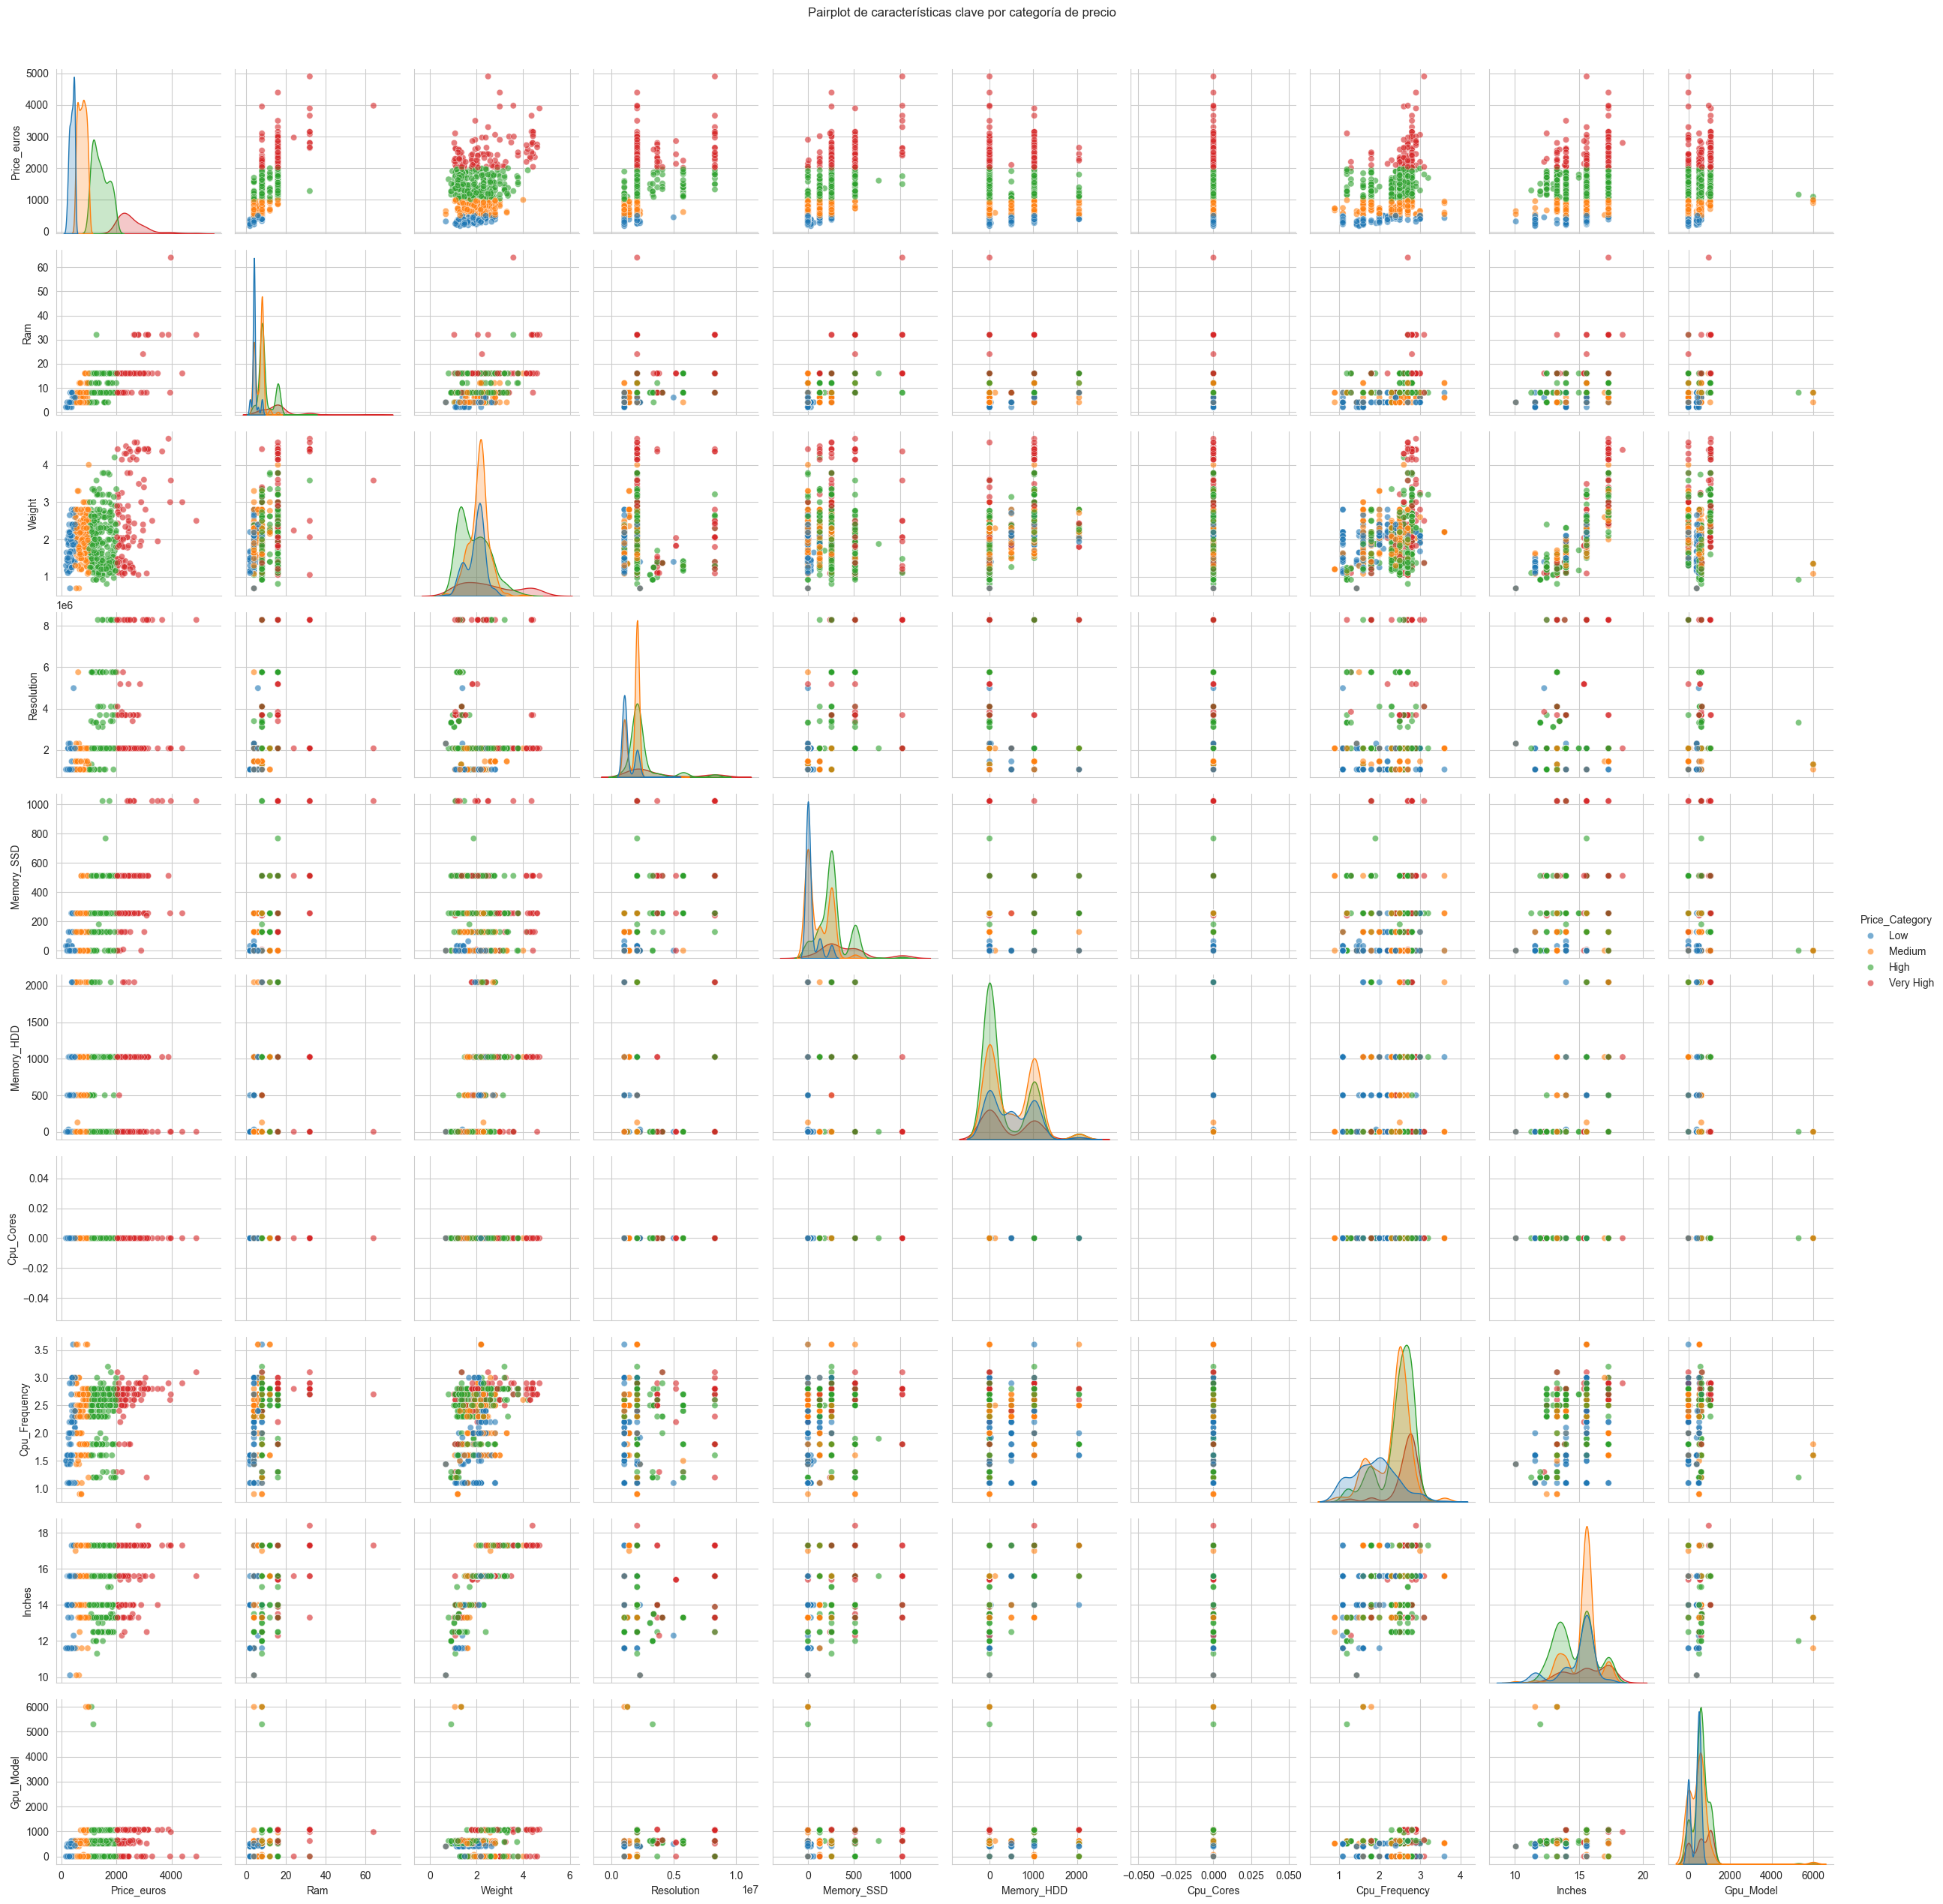

In [32]:
# Seleccionar un subconjunto de variables numéricas clave
subset_columns = ['Price_euros', 'Ram', 'Weight', 'Resolution', 'Memory_SSD', 'Memory_HDD', 'Cpu_Cores', 'Cpu_Frequency', 'Inches','Gpu_Model']

# Crear un dataframe con las columnas seleccionadas
pairplot_df = train_df[subset_columns].copy()

# Crear categorías para 'Price_euros'
bins = [0, 500, 1000, 2000, 5000]  # Rango de precios
labels = ['Low', 'Medium', 'High', 'Very High']  # Etiquetas para las categorías
pairplot_df['Price_Category'] = pd.cut(pairplot_df['Price_euros'], bins=bins, labels=labels)

# Generar el pairplot con hue
sns.pairplot(pairplot_df, diag_kind='kde', hue='Price_Category', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot de características clave por categoría de precio", y=1.02)
plt.show()



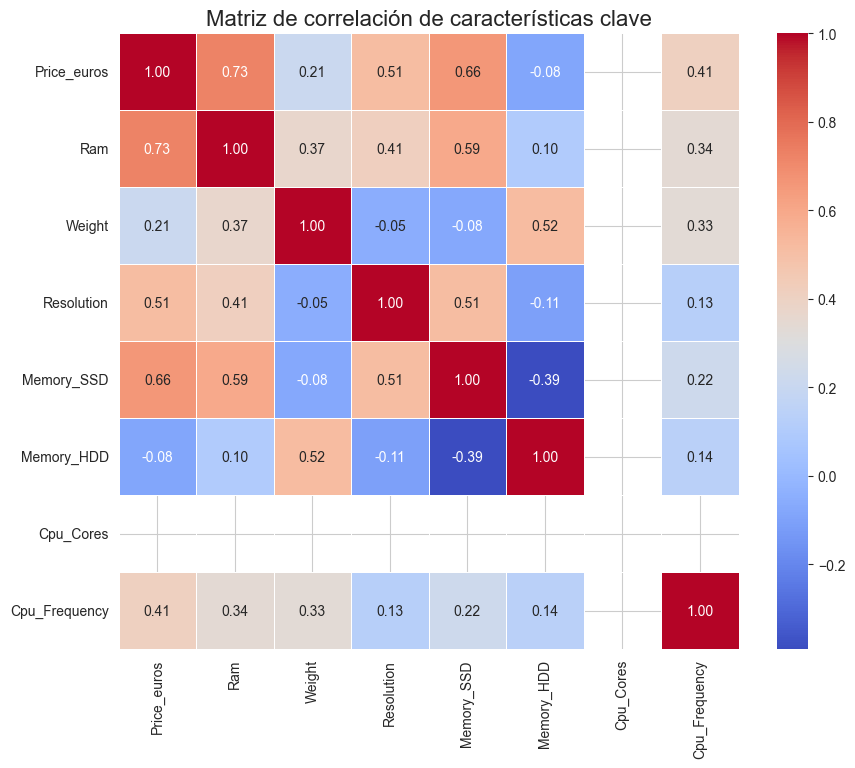

In [33]:
# Seleccionar las columnas numéricas clave para la matriz de correlación
correlation_columns = ['Price_euros', 'Ram', 'Weight', 'Resolution', 'Memory_SSD', 'Memory_HDD', 'Cpu_Cores', 'Cpu_Frequency']

# Calcular la matriz de correlación
correlation_matrix = train_df[correlation_columns].corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Visualizar la matriz de correlación como un heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=0.5
)

# Título del heatmap
plt.title("Matriz de correlación de características clave", fontsize=16)

# Mostrar el gráfico
plt.show()


Entrenando modelo: Random Forest...
Entrenando modelo: Gradient Boosting...
Entrenando modelo: XGBoost...
Tabla de Importancia de Características:
                             Random Forest  Gradient Boosting   XGBoost  \
Ram                               0.524290           0.443546  0.215896   
TypeName_Notebook                 0.075068           0.080586  0.141992   
Memory_SSD                        0.061295           0.115840  0.021650   
TypeName_Workstation              0.020209           0.028689  0.122121   
Cpu_Frequency                     0.063289           0.053536  0.019008   
Gpu_Model                         0.048336           0.048237  0.019448   
Cpu_Series_i7                     0.019231           0.054263  0.042271   
Resolution                        0.035674           0.052337  0.025360   
OpSys_Windows 7                   0.008962           0.018713  0.069289   
Inches                            0.041381           0.039993  0.012084   
Cpu_Series_i5               

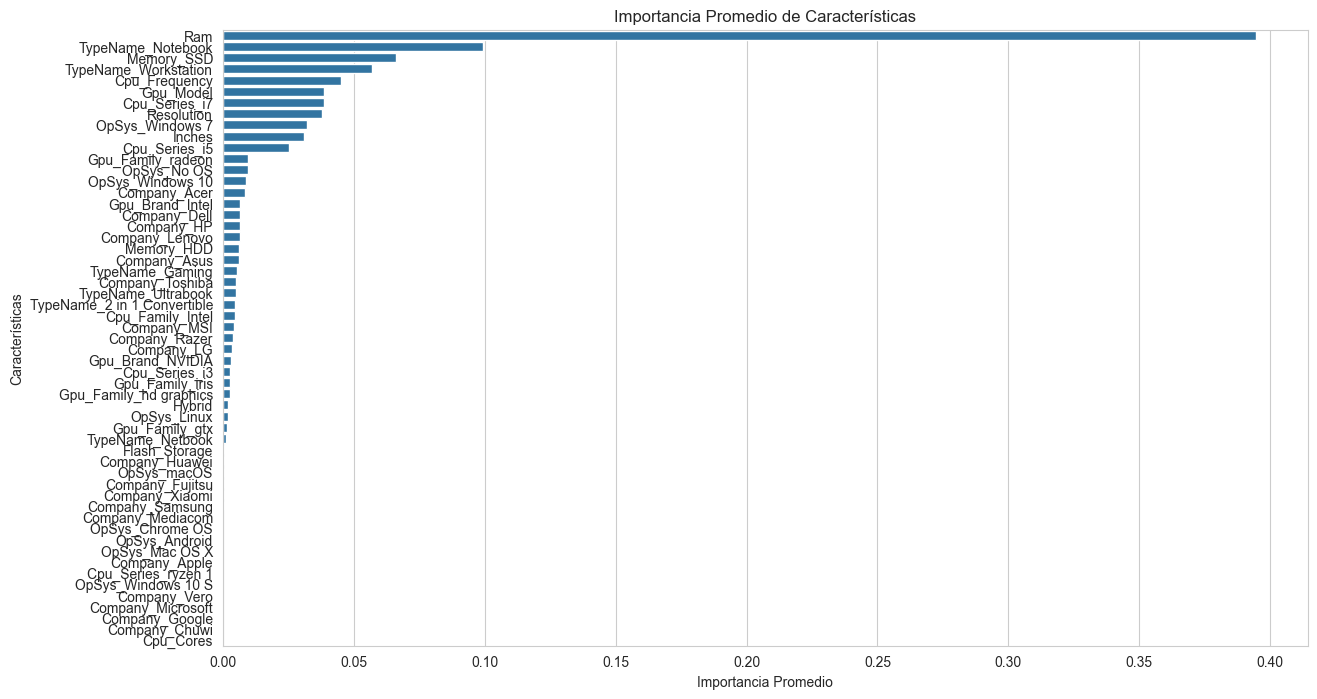

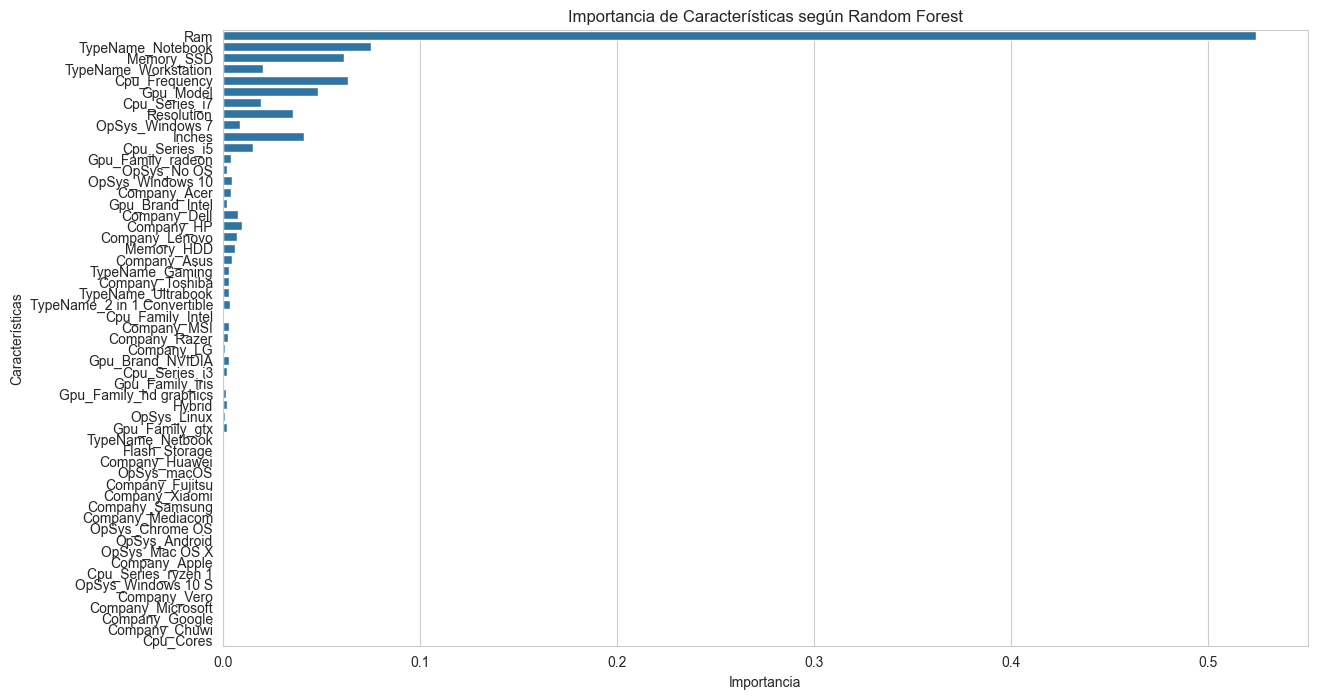

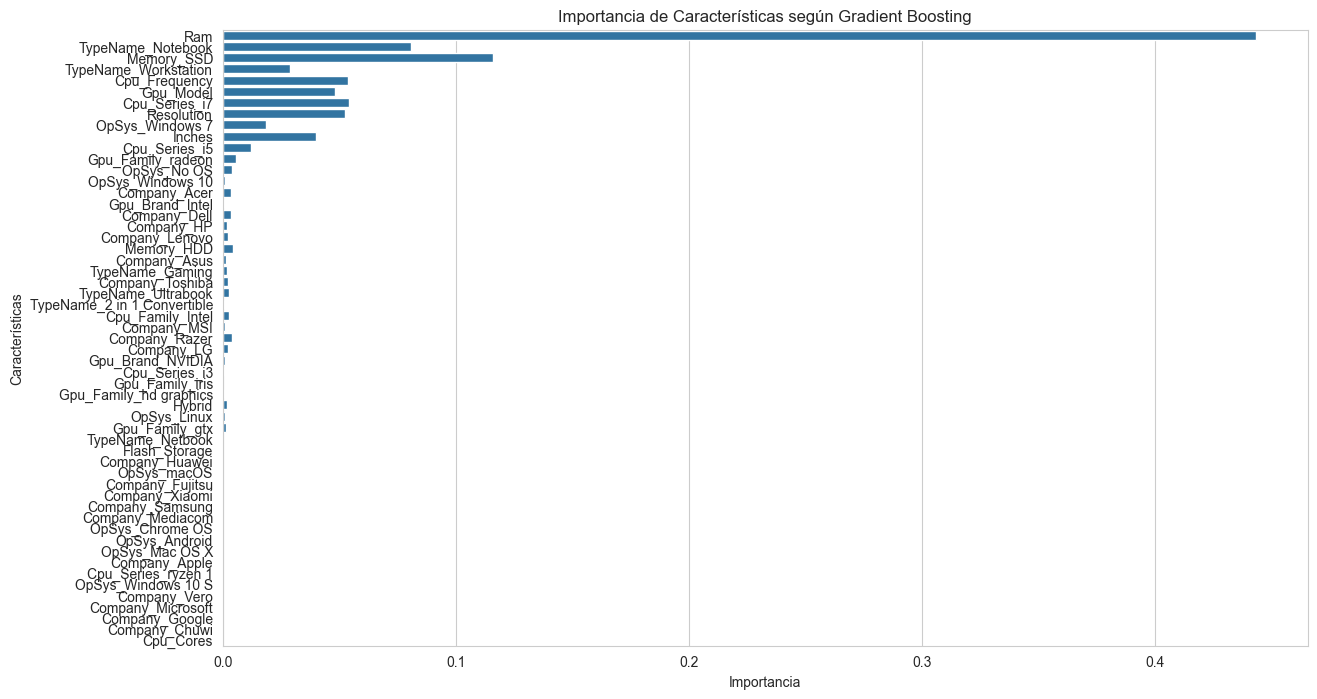

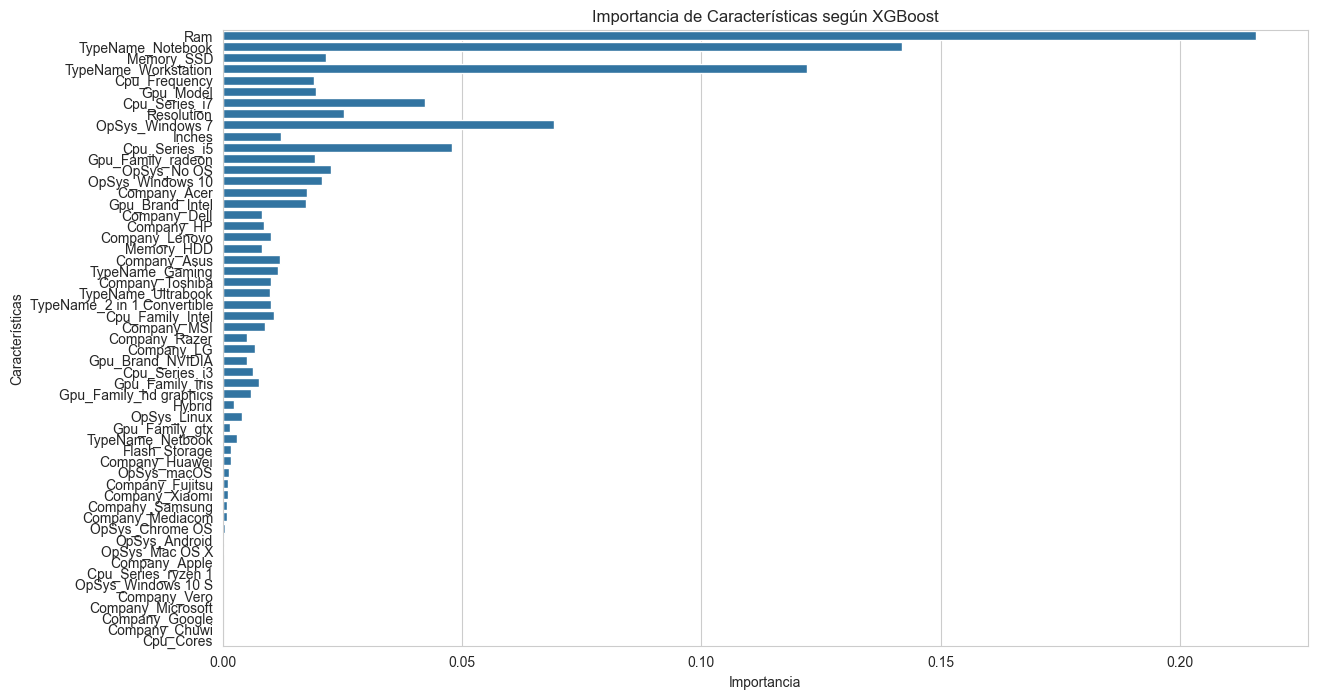

In [34]:
# Definir modelos a usar
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

# Crear un DataFrame para almacenar las importancias de características
feature_importances = pd.DataFrame(index=X_train_improved.columns)

# Iterar sobre los modelos para calcular importancias
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}...")
    model.fit(X_train_improved, y_train)  # Entrenar modelo
    
    # Obtener importancias de características y agregarlas a la tabla
    feature_importances[model_name] = model.feature_importances_

# Calcular el promedio de importancias
feature_importances['Average Importance'] = feature_importances.mean(axis=1)

# Ordenar las características por su importancia promedio
feature_importances = feature_importances.sort_values(by='Average Importance', ascending=False)

# Mostrar la tabla de importancias
print("Tabla de Importancia de Características:")
print(feature_importances)

# Visualización de importancias
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={'index': 'Feature'}, inplace=True)

plt.figure(figsize=(14, 8))

# Crear un gráfico por modelo
sns.barplot(data=feature_importances, x='Average Importance', y='Feature', orient='h')
plt.title("Importancia Promedio de Características")
plt.xlabel("Importancia Promedio")
plt.ylabel("Características")
plt.show()

# Gráfico separado por modelo
for model_name in models.keys():
    plt.figure(figsize=(14, 8))
    sns.barplot(data=feature_importances, x=model_name, y='Feature', orient='h')
    plt.title(f"Importancia de Características según {model_name}")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

In [35]:
X_test_improved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       391 non-null    float64
 1   Ram                          391 non-null    int32  
 2   Resolution                   391 non-null    float64
 3   Memory_SSD                   391 non-null    int64  
 4   Memory_HDD                   391 non-null    int64  
 5   Flash_Storage                391 non-null    int64  
 6   Hybrid                       391 non-null    int64  
 7   Cpu_Cores                    391 non-null    int64  
 8   Cpu_Frequency                391 non-null    float64
 9   Gpu_Model                    391 non-null    int64  
 10  Cpu_Family_Intel             391 non-null    bool   
 11  Cpu_Series_i3                391 non-null    bool   
 12  Cpu_Series_i5                391 non-null    bool   
 13  Cpu_Series_i7       

In [36]:
X_train_improved.head()

,Inches,Ram,Resolution,Memory_SSD,Memory_HDD,Flash_Storage,Hybrid,Cpu_Cores,Cpu_Frequency,Gpu_Model,...,TypeName_Workstation,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,12.5,4,2073600.0,0,0,1,0,0,0.9,515,...,False,False,True,False,False,False,False,False,False,False
1,17.3,8,2073600.0,256,1024,0,0,0,3.2,580,...,False,False,False,False,False,False,True,False,False,False
2,15.6,4,2073600.0,0,1024,0,0,0,2.7,620,...,False,False,False,False,False,False,True,False,False,False
3,13.3,16,5760000.0,512,0,0,0,0,2.5,640,...,False,False,False,False,False,False,True,False,False,False
4,15.6,4,2073600.0,0,0,0,1,0,2.5,520,...,False,False,False,False,False,False,False,False,True,False


## Definir modelos mas adecuados para predecir y evaluar su rendimiento

## Predicciones y archivo salida

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Identificar columnas numéricas y categóricas
numerical_cols = X_train_split.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = X_train_split.select_dtypes(include=["object", "category"]).columns

# Preprocesador para escalado y codificación
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
    ],
    remainder="passthrough"  # Dejar columnas categóricas sin cambios si las hay
)

# Ampliar los hiperparámetros
models_params = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [6, 10, 15],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2", None],
        },
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [6, 10],
            "subsample": [0.6, 0.8, 1.0],
        },
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42, n_jobs=-1, eval_metric='logloss'),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "max_depth": [6, 10],
            "learning_rate": [0.01, 0.05, 0.1],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0],
            "gamma": [0, 0.1, 0.2],
        },
    },
}

# Diccionario para almacenar resultados
results = {}

# Iterar sobre los modelos y realizar GridSearchCV con preprocesamiento
for model_name, config in models_params.items():
    print(f"Optimizing {model_name}...")

    # Crear pipeline con preprocesador y modelo
    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", config["model"]),
        ]
    )

    # Actualizar parámetros para el pipeline
    param_grid = {f"model__{key}": value for key, value in config["params"].items()}

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        verbose=2,
    )
    grid_search.fit(X_train_split, y_train_log)

    # Obtener el mejor modelo y evaluar
    best_model = grid_search.best_estimator_
    y_pred_log = best_model.predict(X_val_split)
    y_pred = np.expm1(y_pred_log)  # Invertir logaritmo para obtener valores originales
    mae = mean_absolute_error(y_val_split, y_pred)

    print(f"Mejores parámetros para {model_name}: {grid_search.best_params_}")
    print(f"MAE para {model_name}: {mae}")

    # Guardar resultados
    results[model_name] = {
        "best_model": best_model,
        "best_params": grid_search.best_params_,
        "mae": mae,
    }

# Mostrar el modelo con mejor rendimiento
best_model_name = min(results, key=lambda x: results[x]["mae"])
print(f"El mejor modelo es {best_model_name} con un MAE de {results[best_model_name]['mae']}")


Optimizing Random Forest...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros para Random Forest: {'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}
MAE para Random Forest: 195.9283967260576
Optimizing Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores parámetros para Gradient Boosting: {'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.6}
MAE para Gradient Boosting: 173.12859104487222
Optimizing XGBoost...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Mejores parámetros para XGBoost: {'model__colsample_bytree': 0.6, 'model__gamma': 0, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 300, 'model__subsample': 0.8}
MAE para XGBoost: 166.500659539895
El mejor modelo es XGBoost con un MAE de 166.500659539895


In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_ID                    391 non-null    int64  
 2   Company                      391 non-null    object 
 3   Product                      391 non-null    object 
 4   Inches                       391 non-null    float64
 5   ScreenResolution             391 non-null    object 
 6   Ram                          391 non-null    int32  
 7   Gpu                          391 non-null    object 
 8   Weight                       391 non-null    float64
 9   Resolution                   391 non-null    float64
 10  Memory_SSD                   391 non-null    int64  
 11  Memory_HDD                   391 non-null    int64  
 12  Flash_Storage                391 non-null    int64  
 13  Hybrid              

In [39]:
# Predecir en el conjunto de prueba
y_pred_test_log = best_model.predict(X_test_improved)

# Invertir la transformación logarítmica para obtener los valores de precio originales
y_pred_test = np.expm1(y_pred_test_log)

if 'id' in test_df.columns:
    output_df = test_df[['id']].copy()
    output_df['Price_euros'] = y_pred_test
    output_df.to_csv('laptop_price_predictions.csv', index=False)
else:
    output_df = pd.DataFrame({
        'Price_euros': y_pred_test
    })
    output_df.to_csv('laptop_price_predictions.csv', index=False)

print("Archivo de predicciones guardado como laptop_price_predictions.csv")



Archivo de predicciones guardado como laptop_price_predictions.csv


MAE: 166.50
MSE: 64206.665834764215
RMSE: 253.39


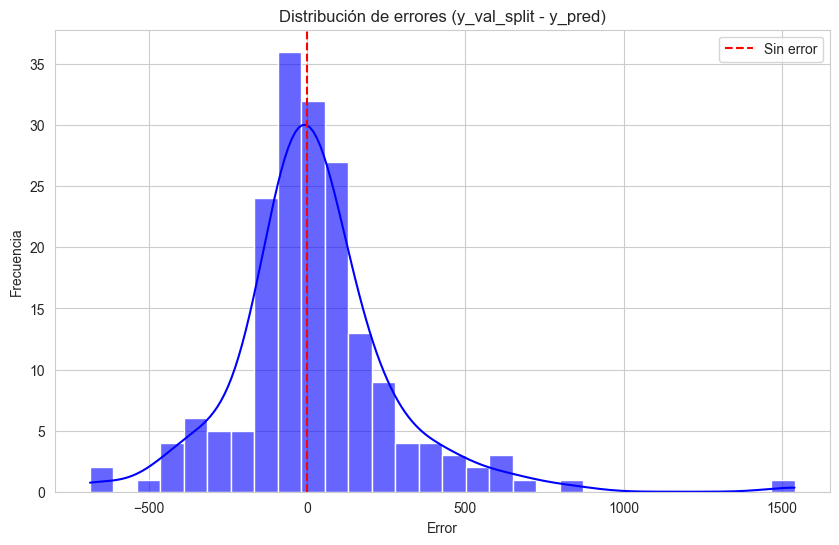

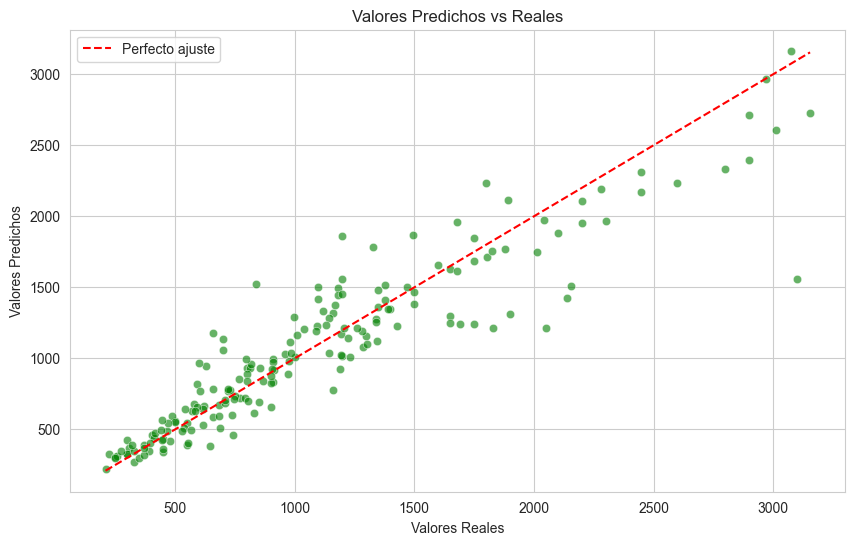

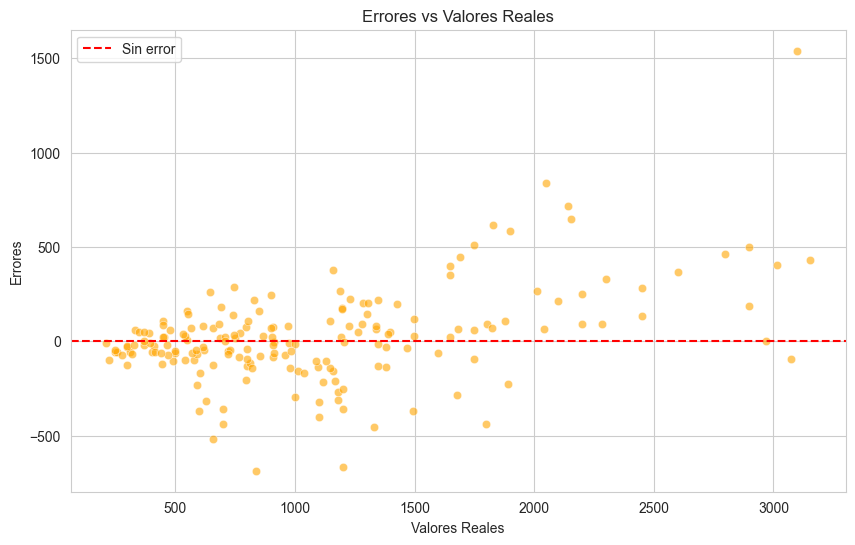

In [40]:
# Predecir con el modelo entrenado
y_pred_log = best_model.predict(X_val_split)
y_pred = np.expm1(y_pred_log)  # Revertir la transformación logarítmica

# Calcular los errores
errors = y_val_split - y_pred
mae = mean_absolute_error(y_val_split, y_pred)
rmse = np.sqrt(mean_squared_error(y_val_split, y_pred))

# Mostrar métricas de error
print(f"MAE: {mae:.2f}")
print('MSE:', metrics.mean_squared_error(y_val_split, y_pred))
print(f"RMSE: {rmse:.2f}")

# Gráfico 1: Histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue', alpha=0.6)
plt.title("Distribución de errores (y_val_split - y_pred)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.axvline(x=0, color='red', linestyle='--', label='Sin error')
plt.legend()
plt.show()

# Gráfico 2: Valores predichos vs valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_split, y=y_pred, alpha=0.6, color='green')
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], color='red', linestyle='--', label='Perfecto ajuste')
plt.title("Valores Predichos vs Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.legend()
plt.show()

# Gráfico 3: Gráfico de dispersión de errores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_split, y=errors, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--', label='Sin error')
plt.title("Errores vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Errores")
plt.legend()
plt.show()
